In [1]:
import numpy as np
import sklearn
import autosklearn.classification
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shutil
import tempfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For AutoML - Baseline')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)


In [3]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_test.npy"

In [4]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

### Without Feature Reduction

[WARNING] [2023-11-22 19:04:34,839:Client-EnsembleBuilder] No runs were available to build an ensemble from
Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.38621794871794873
Mean Squared Error: 0.61


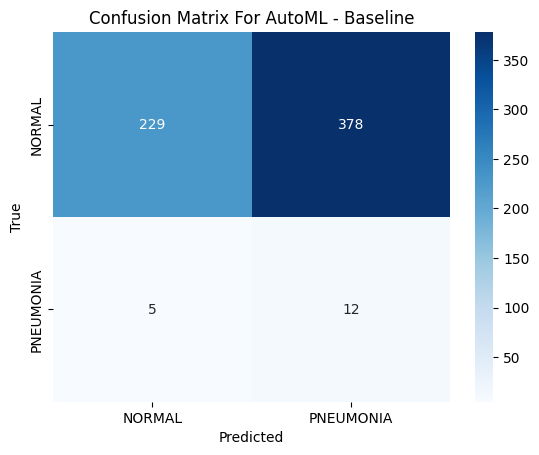

              precision    recall  f1-score   support

      NORMAL       0.38      0.98      0.54       234
   PNEUMONIA       0.71      0.03      0.06       390

    accuracy                           0.39       624
   macro avg       0.54      0.50      0.30       624
weighted avg       0.58      0.39      0.24       624

auto-sklearn results:
  Dataset name: 6cee2222-8948-11ee-bf5a-b496916b8308
  Metric: accuracy
  Best validation score: 0.970964
  Number of target algorithm runs: 50
  Number of successful target algorithm runs: 35
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 6



In [5]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=300,
        per_run_time_limit=120,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')     


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### Experimenting on 100 Features

In [6]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_test.npy"

In [7]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

Validation Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.38621794871794873
Mean Squared Error: 0.61


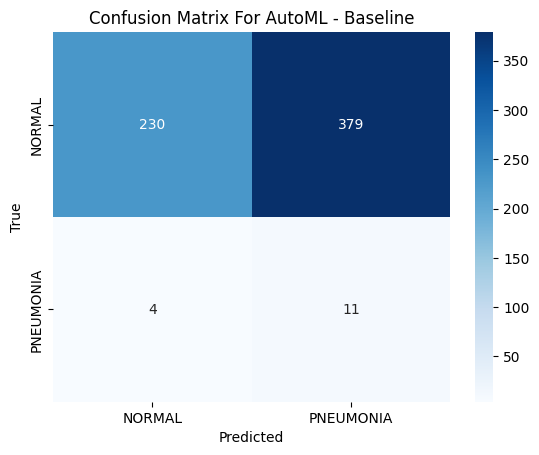

              precision    recall  f1-score   support

      NORMAL       0.38      0.98      0.55       234
   PNEUMONIA       0.73      0.03      0.05       390

    accuracy                           0.39       624
   macro avg       0.56      0.51      0.30       624
weighted avg       0.60      0.39      0.24       624

auto-sklearn results:
  Dataset name: 20fbc194-8949-11ee-bf5a-b496916b8308
  Metric: accuracy
  Best validation score: 0.968641
  Number of target algorithm runs: 76
  Number of successful target algorithm runs: 61
  Number of crashed target algorithm runs: 4
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 4



In [8]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=300,
        per_run_time_limit=120,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)

    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')


    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### LDA

In [9]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [10]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

[WARNING] [2023-11-22 19:14:26,305:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 19:14:26,444:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 19:14:26,893:Client-EnsembleBuilder] No runs were available to build an ensemble from
Validation Accuracy: 0.4375
Mean Squared Error: 0.56
Test Accuracy: 0.3942307692307692
Mean Squared Error: 0.61


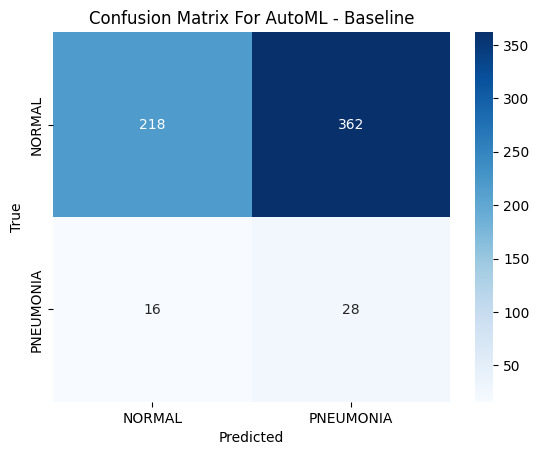

              precision    recall  f1-score   support

      NORMAL       0.38      0.93      0.54       234
   PNEUMONIA       0.64      0.07      0.13       390

    accuracy                           0.39       624
   macro avg       0.51      0.50      0.33       624
weighted avg       0.54      0.39      0.28       624

auto-sklearn results:
  Dataset name: d0f3e46c-8949-11ee-bf5a-b496916b8308
  Metric: accuracy
  Best validation score: 0.965738
  Number of target algorithm runs: 124
  Number of successful target algorithm runs: 98
  Number of crashed target algorithm runs: 25
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [11]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=300,
        per_run_time_limit=120,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_lda, y_train)
    y_pred_val = automl_classifier.predict(X_val_lda)
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_lda, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### PCA

In [12]:
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_val = scaler.transform(X_val_features)
scaled_X_test = scaler.transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(scaled_X_train)
X_val_pca = pca.fit_transform(scaled_X_val)
X_test_pca = pca.fit_transform(scaled_X_test)

print(X_train_pca.shape)
print(X_val_pca.shape)
print(X_test_pca.shape)

(5216, 16)
(16, 16)
(624, 16)


Validation Accuracy: 0.4375
Mean Squared Error: 0.56
Test Accuracy: 0.5432692307692307
Mean Squared Error: 0.46


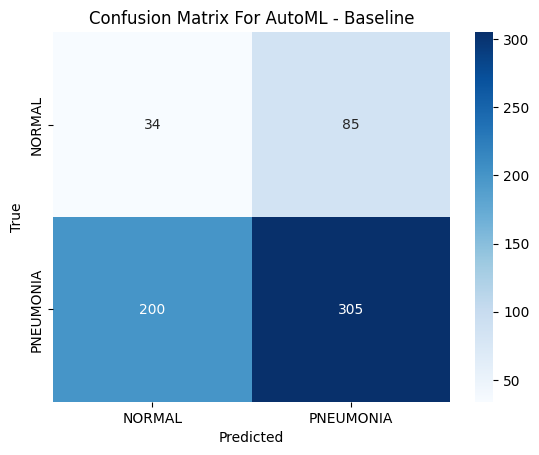

              precision    recall  f1-score   support

      NORMAL       0.29      0.15      0.19       234
   PNEUMONIA       0.60      0.78      0.68       390

    accuracy                           0.54       624
   macro avg       0.44      0.46      0.44       624
weighted avg       0.48      0.54      0.50       624

auto-sklearn results:
  Dataset name: 831cad68-894a-11ee-bf5a-b496916b8308
  Metric: accuracy
  Best validation score: 0.950058
  Number of target algorithm runs: 87
  Number of successful target algorithm runs: 83
  Number of crashed target algorithm runs: 2
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [13]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=300,
        per_run_time_limit=120,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_pca, y_train)
    y_pred_val = automl_classifier.predict(X_val_pca)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_pca, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### T-SNE

In [14]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

Validation Accuracy: 0.3125
Mean Squared Error: 0.69
Test Accuracy: 0.5961538461538461
Mean Squared Error: 0.40


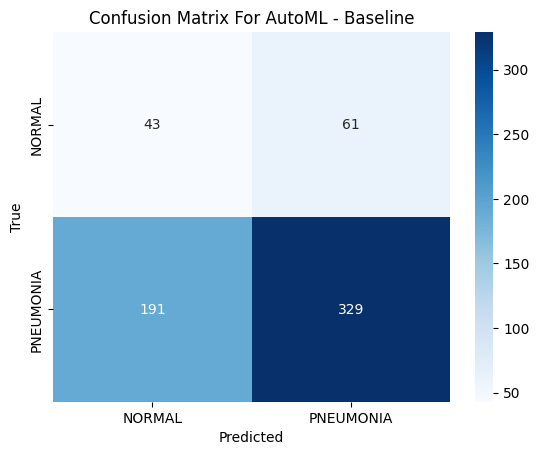

              precision    recall  f1-score   support

      NORMAL       0.41      0.18      0.25       234
   PNEUMONIA       0.63      0.84      0.72       390

    accuracy                           0.60       624
   macro avg       0.52      0.51      0.49       624
weighted avg       0.55      0.60      0.55       624

auto-sklearn results:
  Dataset name: 79f036bd-894b-11ee-bf5a-b496916b8308
  Metric: accuracy
  Best validation score: 0.951220
  Number of target algorithm runs: 107
  Number of successful target algorithm runs: 102
  Number of crashed target algorithm runs: 2
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



In [15]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=300,
        per_run_time_limit=120,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_tsne, y_train)
    y_pred_val = automl_classifier.predict(X_val_tsne)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_tsne, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

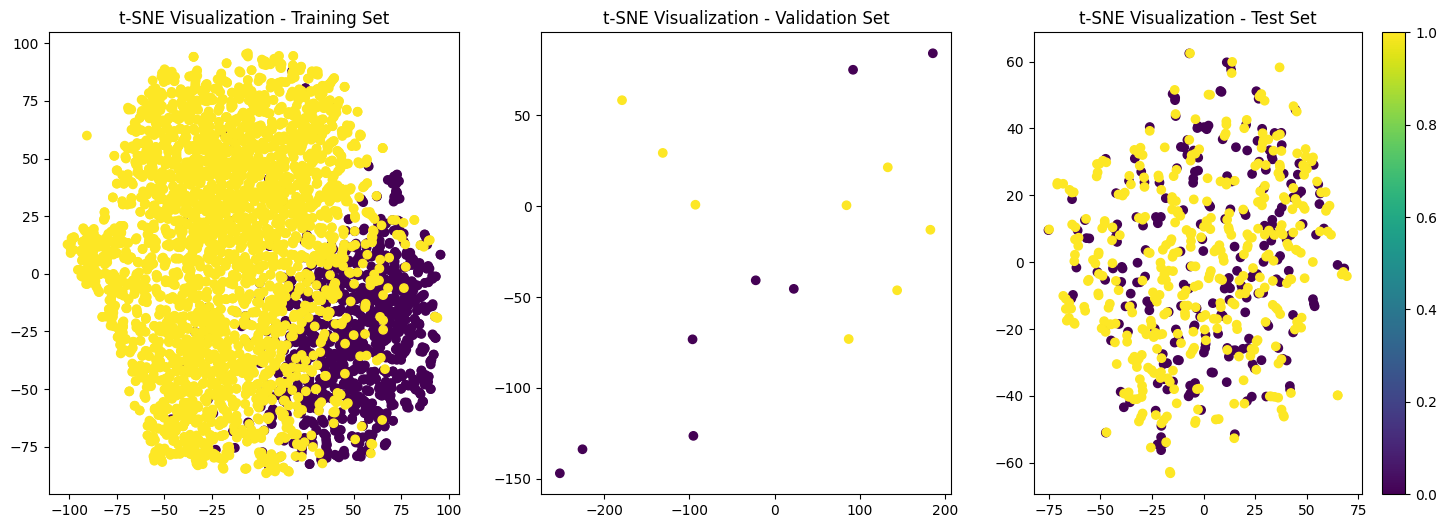

In [16]:
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()